<a href="https://colab.research.google.com/github/crux007/crux007/blob/main/House_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [2]:
train_data = pd.read_csv('/content/drive/MyDrive/msc_training_dataset.csv')

In [3]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

In [4]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [5]:
best_score = 0
best_max_depth = 0
for max_depth in range(1, 11):
    # Create a decision tree regression model
    model = DecisionTreeRegressor(max_depth=max_depth)

    # Fit the model to the scaled training data
    model.fit(X_train_scaled, y_train)

    # Compute the R^2 score on the scaled training data
    score = model.score(X_train_scaled, y_train)

     # If the score is better than the previous best score, update the best score and best max_depth
    if score > best_score:
        best_score = score
        best_max_depth = max_depth


In [6]:
# Print the best max_depth and best score
print("Best max_depth:", best_max_depth)
print("Best score:", best_score)

Best max_depth: 10
Best score: 0.9932257337773296


In [7]:
test_data = pd.read_csv('/content/drive/MyDrive/msc_testing_dataset.csv')

In [8]:
X_test = test_data.iloc[:, :-1]

In [9]:
X_test_scaled = scaler.transform(X_test)

In [10]:
model = DecisionTreeRegressor(max_depth=best_max_depth)

In [11]:
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=10)

In [12]:
# Make predictions on the scaled test data using the trained model
y_pred = model.predict(X_test_scaled)

# Print the predicted prices
print(y_pred)

[ 5287.          7737.5        11305.          8845.
 10922.5        11591.         11768.33333333  6948.33333333
  8100.          5900.          8989.          8665.
  7065.         11289.          7767.22222222  9375.
  8885.         13028.33333333 10185.          6880.
  8845.          7475.          7021.66666667  3890.
 10335.          7526.11111111  8067.          9325.
  6795.          9195.          6675.          9998.33333333
 10455.          8292.14285714  7600.         10355.
  8605.         10968.33333333  9337.         13255.
  6761.66666667  5145.         10100.          8902.5
 11335.          6175.          4175.         11440.
  9198.33333333  5145.         11485.         10777.5
  4768.33333333  8190.         13970.          9440.
  5945.          8735.         10355.          7887.
  7715.         13695.          7635.          8440.
 12965.          8067.         11215.         10495.
 10165.          5849.28571429  8030.         12275.
  4175.          6335.      

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score

In [15]:
# Evaluate the performance of the model using various metrics
mse = mean_squared_error(test_data.iloc[:, -1], y_pred)
mae = mean_absolute_error(test_data.iloc[:, -1], y_pred)
r2 = r2_score(test_data.iloc[:, -1], y_pred)
f1 = f1_score(test_data.iloc[:, -1] > 7000, y_pred > 7000, average='binary')

In [16]:
# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("F1-score:", f1)

Mean Squared Error: 133482.53954213636
Mean Absolute Error: 290.4512188956633
R-squared: 0.9728371098104008
F1-score: 0.9756418696510862


In [17]:
importances = model.feature_importances_
for i, col in enumerate(X_train.columns):
    print(f"{col}: {importances[i]:.3f}")

room: 0.430
bathroom: 0.004
kitchen: 0.010
french_door: 0.006
backyard: 0.015
furnished: 0.202
green_paint: 0.006
solar_power: 0.115
woodfloor: 0.177
qlm_security: 0.008
club_access: 0.027


In [19]:
import numpy as np

In [20]:
importances = model.feature_importances_
sorted_idx = np.argsort(importances)
pos = np.arange(sorted_idx.shape[0]) + .5

In [22]:
import matplotlib.pyplot as plt

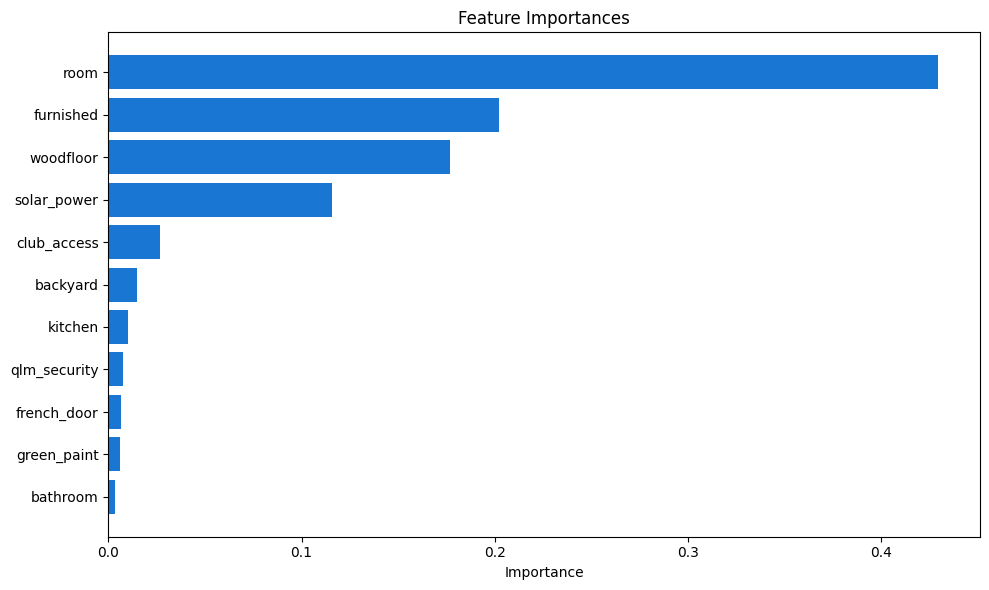

In [23]:
plt.figure(figsize=(10, 6))
plt.barh(pos, importances[sorted_idx], align='center', color='#1976D2')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [25]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=45d3900ab30af614e962d6df0833ccddbf3ac93ecd0da9451d321fa9f57cff31
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [26]:
import lime
import lime.lime_tabular

In [36]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['price'],
    mode='regression'
)

In [37]:
# Select a random data point from the test set for explanation
i = 42
x = X_test.iloc[[i]]

In [38]:
# Use the explainer to generate a local explanation for the prediction
exp = explainer.explain_instance(
    data_row=x.values[0],
    predict_fn=model.predict,
    num_features=len(X_train.columns)
)

In [39]:
print(exp.as_list())

[('furnished <= 0.00', -2066.9931427555775), ('0.00 < woodfloor <= 1.00', 1891.8878678694584), ('0.00 < solar_power <= 1.00', 1525.944536599618), ('club_access <= 0.00', -689.3919627874644), ('backyard <= 0.00', -474.65810707505443), ('1.00 < kitchen <= 2.00', 396.44545305628077), ('qlm_security <= 0.00', -312.6162683080133), ('french_door <= 1.00', -280.7906633115061), ('0.00 < green_paint <= 1.00', 214.2859313708464), ('1.00 < bathroom <= 2.00', 146.20041132207007), ('3.00 < room <= 4.00', -19.693068722320973)]


In [40]:
weights = pd.DataFrame(exp.as_list(), columns=['Feature', 'Weight'])

# Show the explanation in tabular form
print(weights)

                       Feature       Weight
0            furnished <= 0.00 -2066.993143
1     0.00 < woodfloor <= 1.00  1891.887868
2   0.00 < solar_power <= 1.00  1525.944537
3          club_access <= 0.00  -689.391963
4             backyard <= 0.00  -474.658107
5       1.00 < kitchen <= 2.00   396.445453
6         qlm_security <= 0.00  -312.616268
7          french_door <= 1.00  -280.790663
8   0.00 < green_paint <= 1.00   214.285931
9      1.00 < bathroom <= 2.00   146.200411
10         3.00 < room <= 4.00   -19.693069
